# <center> UE22CS342AA2 - Data Analytics </center>

# <center> Worksheet 4b : Association rule mining (Market Basket Analysis) </center>

<center> Designed by Amritha GK, PESU-25 </center>

<br>

- Student name: Rithvik Muthyalapati
- SRN:          PES2UG22CS451
- Section:      H

Assume that you travel to another parallel universe, where your alter-ego owns a side-hustle retail store. You decide to take up an exercise on association rule mining to improve your skills and extract some essential information to help your alter-ego grow their business.

Given is a dataset that contains some information regarding the transactions at the hypothetical "store".



### About the Dataset:

- InvoiceNo - Identifier for the transaction

- StockCode - Product ID

- Description - Product name/description

- Quantity - Product quantity

- InvoiceDate - Date of the transaction

- UnitPrice - Price per item

- CustomerID - Identifier for the customer



For those solving with R, Use the **'arules'** and **'arulesViz'** package wherever necessary.

For those solving with Python, use the **'mlxtend'** or **'apyori'** or any other suitable package wherever necessary

## Install the required packages

In [49]:
#install.packages(readxl)

#install.packages("arules")

#install.packages("arulesViz")

## Load the required packages

In [50]:
library(readxl)

library(dplyr)

library(arules)

library(arulesViz)

## Load the dataset and create dataframe

In [51]:
# Your code here

file_path <- "/kaggle/input/online-retail-dataset/Worksheet-4b_Online_retail_dataset.xlsx" 

# Load the dataset
df <- read_excel(file_path)
head(df)
str(df)

Warning message:
“Expecting numeric in A288774 / R288774C1: got 'A563185'”
Warning message:
“Expecting numeric in A288775 / R288775C1: got 'A563186'”
Warning message:
“Expecting numeric in A288776 / R288776C1: got 'A563187'”


BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom


tibble [522,064 × 7] (S3: tbl_df/tbl/data.frame)
 $ BillNo    : num [1:522064] 536365 536365 536365 536365 536365 ...
 $ Itemname  : chr [1:522064] "WHITE HANGING HEART T-LIGHT HOLDER" "WHITE METAL LANTERN" "CREAM CUPID HEARTS COAT HANGER" "KNITTED UNION FLAG HOT WATER BOTTLE" ...
 $ Quantity  : num [1:522064] 6 6 8 6 6 2 6 6 6 32 ...
 $ Date      : POSIXct[1:522064], format: "2010-12-01 08:26:00" "2010-12-01 08:26:00" ...
 $ Price     : num [1:522064] 2.55 3.39 2.75 3.39 3.39 7.65 4.25 1.85 1.85 1.69 ...
 $ CustomerID: num [1:522064] 17850 17850 17850 17850 17850 ...
 $ Country   : chr [1:522064] "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...


## Dataset preparation

Perform data cleaning, Transform the representation as suitable for this problem

Some hints to help you get started:
- Check the summary, number of rows and columns
- Remove duplicate entries
- Check which columns contain information that is necessary for this exercise
- Remove rows with NA values in these columns.

### (1 point)

     BillNo         Itemname            Quantity       
 Min.   :536365   Length:522064      Min.   :-9600.00  
 1st Qu.:547892   Class :character   1st Qu.:    1.00  
 Median :560603   Mode  :character   Median :    3.00  
 Mean   :559951                      Mean   :   10.09  
 3rd Qu.:571892                      3rd Qu.:   10.00  
 Max.   :581587                      Max.   :80995.00  
 NA's   :3                                             
      Date                            Price              CustomerID    
 Min.   :2010-12-01 08:26:00.00   Min.   :-11062.060   Min.   :12346   
 1st Qu.:2011-03-28 10:15:00.00   1st Qu.:     1.250   1st Qu.:13950   
 Median :2011-07-20 08:59:00.00   Median :     2.080   Median :15265   
 Mean   :2011-07-04 12:51:20.77   Mean   :     3.827   Mean   :15317   
 3rd Qu.:2011-10-19 14:12:00.00   3rd Qu.:     4.130   3rd Qu.:16837   
 Max.   :2011-12-09 12:50:00.00   Max.   : 13541.330   Max.   :18287   
                                                

[1] 522064      7

Warning message in asMethod(object):
“removing duplicated items in transactions”
Warning message in asMethod(object):
“removing duplicated items in transactions”


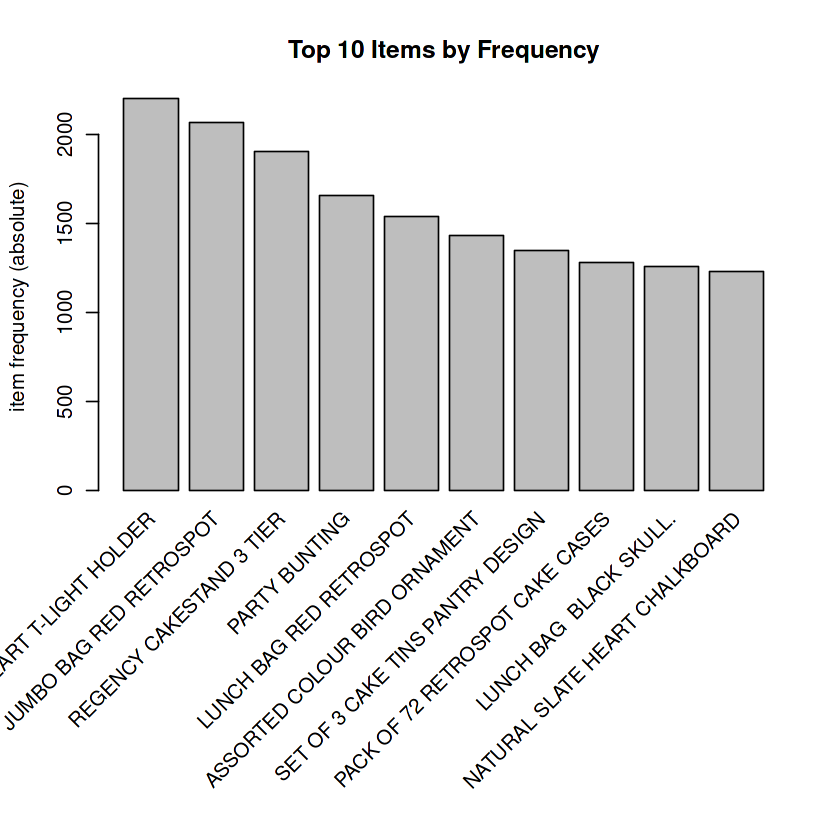

In [52]:

# Your code here

summary(df)
dim(df)

df <- df %>% distinct()

# Select only necessary columns
df <- df %>% select(BillNo, Itemname, Quantity)

# Remove rows with NA values in essential columns
df <- df %>% filter(!is.na(BillNo) & !is.na(Itemname) & Quantity > 0)


# Convert the dataframe into a list of transactions

#transaction_list <- split(cleaned_df$Itemname, cleaned_df$BillNo)

# Group items by BillNo for transaction-based format
transaction_data <- df %>%
  group_by(BillNo) %>%
  summarize(items = paste(Itemname, collapse = ","))
  
# Convert to transaction format
trans_list <- strsplit(transaction_data$items, ",")
names(trans_list) <- transaction_data$BillNo
transactions <- as(trans_list, "transactions")
# inspect(head(transactions))
# summary(transactions)



# Convert the list into a transactions object
transactions <- as(trans_list, "transactions")

# Create an item frequency plot
# Load necessary library
library(arulesViz)

# Create an item frequency plot
itemFrequencyPlot(transactions, topN = 10, type = "absolute", main = "Top 10 Items by Frequency")




## Problem 1

1. What are the 10 most popular itemsets, given Minimum Support Count = 0.02? Display the itemsets, frequency and support.

2. Find Confidence and Lift of the association rule "{PINK REGENCY TEACUP AND SAUCER} => {GREEN REGENCY TEACUP AND SAUCER}".

3. Based on the value of Lift, what do you infer regarding the given association rule?


### 3 points (1+1+1)

In [53]:
# Your code here

# Load necessary libraries
library(arules)

# Generate frequent itemsets with minimum support of 0.02
frequent_itemsets <- apriori(transactions, parameter = list(support = 0.02, target = "frequent itemsets"))

# Inspect the top 10 itemsets sorted by support
top_itemsets <- sort(frequent_itemsets, by = "support", decreasing = TRUE)[1:10]
inspect(top_itemsets)


# Generate rules with the specific rule in mind
rules <- apriori(transactions, 
                 parameter = list(support = 0.02, confidence = 0.1), 
                 appearance = list(lhs = "PINK REGENCY TEACUP AND SAUCER", rhs = "GREEN REGENCY TEACUP AND SAUCER"),
                 control = list(verbose = FALSE))

# Display the rule with confidence and lift
inspect(rules)


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 394 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4102 item(s), 19732 transaction(s)] done [0.22s].
sorting and recoding items ... [301 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 done [0.02s].
sorting transactions ... done [0.01s].
writing ... [387 set(s)] done [0.00s].
creating S4 object  ... done [0.01s].
     items                                support    count
[1]  {WHITE HANGING HEART T-LIGHT HOLDER} 0.11159538 2202 
[2]  {JUMBO BAG RED RETROSPOT}            0.10460166 2064 
[3]  {REGENCY CAKESTAND 3 TIER}           0.096

In [54]:
# Interpreting the Lift Value
# Lift is a measure of how much more likely two items are to be purchased together than they would be if they were independent.

# For example:
# Lift > 1: The items are positively associated and often bought together.
# Lift = 1: The items are bought together at a rate similar to chance.
# Lift < 1: The items are negatively associated, indicating they are less likely to be bought together than expected by chance.

## Problem 2

1. What are the top-5 itemsets that you would recommend for cross-selling?

Hint: Association rules. List the antecedents, consequents, support, confidence and lift.


2. Recount a personal experience where you have come across cross-selling or up-selling in any of your purchases (be it online, at restaurants or some other place). Was it useful to you? Did you accept or decline the offer?



### 2 points (1+1)

In [55]:
# Your code here
# Generate association rules with a minimum support and confidence threshold
rules <- apriori(transactions, parameter = list(support = 0.01, confidence = 0.2))

# Sort the rules by lift and confidence to find the strongest associations
top_cross_sell_rules <- sort(rules, by = c("lift", "confidence"), decreasing = TRUE)[1:5]

# Display the top 5 rules for cross-selling with support, confidence, and lift
inspect(top_cross_sell_rules)


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 197 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4102 item(s), 19732 transaction(s)] done [0.21s].
sorting and recoding items ... [812 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 done [0.08s].
writing ... [2110 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].
    lhs                        rhs                       support confidence   coverage     lift count
[1] {HERB MARKER PARSLEY,                                                                            
     HERB MARKER ROSEMARY}  => {HERB MARKER THYME}    0.01013582  0.9523810

In [56]:
#Interpretation
#When recommending cross-selling options, rules with high lift values indicate items that are likely to be purchased together and may be relevant for promotional bundling, as customers are more likely to buy them in combination.

# Personal Experience with Cross-Selling or Up-Selling
# Experience: I recall a situation at an online bookstore where, after selecting a popular novel, I received a suggestion to add a discounted book from the same genre. The website displayed a bundle offer showing that many people bought the two books together.
#It was useful but i declined the offer

## Problem 3

Find out a new set of association rules with minimum support=0.025 and minimum confidence = 0.7.

1. Plot a graph of the first 5 association rules (sorted by confidence). 
What are the 3 most important rules on this graph?
2. For R, Plot a Grouped Matrix using these rules, with k = 20. ('k' is the number of groups of itemsets that will be plotted. State 2 points of observations from the plot.
3. For Python, Visualize a scatter plot of the support against confidence (label the corresponding rule). State 2 points of observations from the plot.

For those using the *'arulesViz'* package. You can refer the necessary sections in the documentation of the package for a better understanding on how to interpret the graphs.grphs.



### 4 points (2+2)

In [57]:
# Your code here

# Generate association rules with minimum support of 0.025 and confidence of 0.7
rules <- apriori(transactions, parameter = list(support = 0.025, confidence = 0.7))

# Sort rules by confidence and display the top 5 rules
top_rules <- sort(rules, by = "confidence", decreasing = TRUE)[1:5]
inspect(top_rules)



Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   0.025      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 493 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4102 item(s), 19732 transaction(s)] done [0.21s].
sorting and recoding items ... [188 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 done [0.01s].
writing ... [9 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].
    lhs                                   rhs                                  support confidence   coverage     lift count
[1] {PINK REGENCY TEACUP AND SAUCER,                                                                                       
     ROSES REGENCY TEACUP AND SAUCER} 

In [58]:
# Plot the top 5 rules
plot(top_rules, method = "graph", engine = "htmlwidget", main = "Top 5 Association Rules")


Warning message:
“Unknown control parameters: main”


Available control parameters (with default values):
itemCol	 =  #CBD2FC
nodeCol	 =  c("#EE0000", "#EE0303", "#EE0606", "#EE0909", "#EE0C0C", "#EE0F0F", "#EE1212", "#EE1515", "#EE1818", "#EE1B1B", "#EE1E1E", "#EE2222", "#EE2525", "#EE2828", "#EE2B2B", "#EE2E2E", "#EE3131", "#EE3434", "#EE3737", "#EE3A3A", "#EE3D3D", "#EE4040", "#EE4444", "#EE4747", "#EE4A4A", "#EE4D4D", "#EE5050", "#EE5353", "#EE5656", "#EE5959", "#EE5C5C", "#EE5F5F", "#EE6262", "#EE6666", "#EE6969", "#EE6C6C", "#EE6F6F", "#EE7272", "#EE7575", "#EE7878", "#EE7B7B", "#EE7E7E", "#EE8181", "#EE8484", "#EE8888", "#EE8B8B",  "#EE8E8E", "#EE9191", "#EE9494", "#EE9797", "#EE9999", "#EE9B9B", "#EE9D9D", "#EE9F9F", "#EEA0A0", "#EEA2A2", "#EEA4A4", "#EEA5A5", "#EEA7A7", "#EEA9A9", "#EEABAB", "#EEACAC", "#EEAEAE", "#EEB0B0", "#EEB1B1", "#EEB3B3", "#EEB5B5", "#EEB7B7", "#EEB8B8", "#EEBABA", "#EEBCBC", "#EEBDBD", "#EEBFBF", "#EEC1C1", "#EEC3C3", "#EEC4C4", "#EEC6C6", "#EEC8C8", "#EEC9C9", "#EECBCB", "#EECDCD", "#EECFCF", "#EED0D0", 

HTML widgets cannot be represented in plain text (need html)

Warning message:
“Unknown control parameters: main”


Available control parameters (with default values):
k	 =  20
aggr.fun	 =  function (x, ...)  UseMethod("mean")
rhs_max	 =  10
lhs_label_items	 =  2
col	 =  c("#EE0000FF", "#EEEEEEFF")
groups	 =  NULL
engine	 =  ggplot2
verbose	 =  FALSE


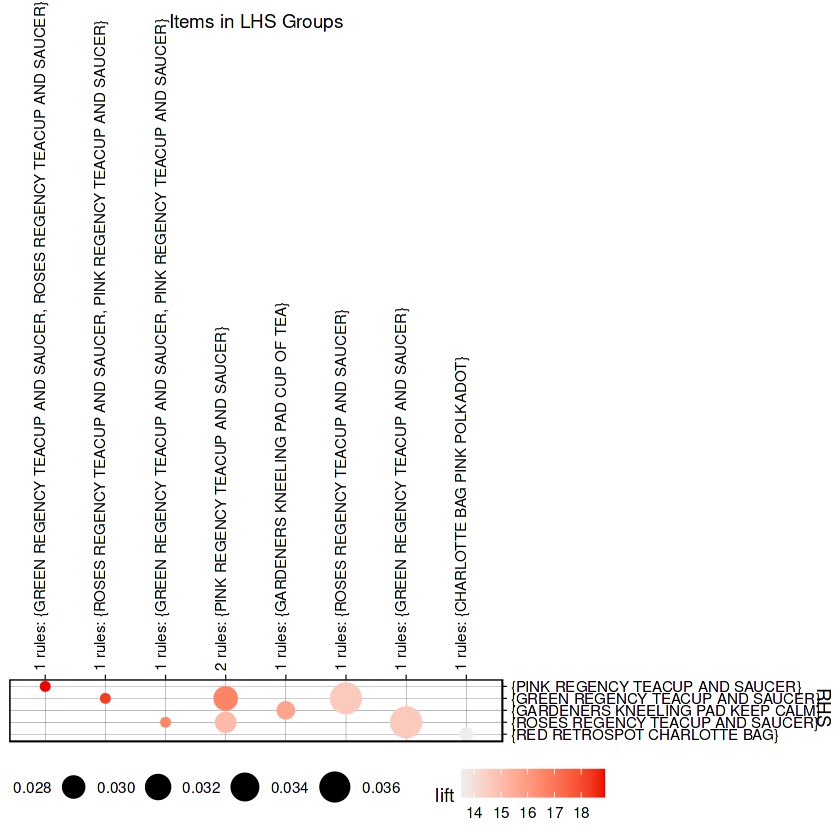

In [59]:
# Plot a grouped matrix with k = 20
plot(rules, method = "grouped", k = 20, main = "Grouped Matrix Plot of Rules")


------

With this, we draw a close to our multiverse adventure and head back to our original world.



Hope this exercise helped you learn something new and hone your skills as a Data Analyst!



Until next time :)